In [180]:
import matplotlib.pyplot as plt
import json
import numpy as np
from pathlib import Path

In [181]:
def read_metrics(path):
    with open(Path(path)/"metrics.json") as f:
        d = json.load(f)
    #for k, v in d.items():
    #    d[k] = np.array(v, dtype=np.float64)
    return d

In [209]:
def plot_metric(ax, d, name):
    ax.plot(d[name]['steps'], d[name]['values'], label=name)
    ax.legend()

# VerletSGLD metrics

Produced with
```bash
python experiments/train_bnn.py -D with model=test_gaussian warmup=0 \
    burnin=0 n_samples=300 inference=VerletSGLD momentum=0.6 lr=10.0
```

Note that loss=temperature because we're sampling from a Gaussian.

In [238]:
d = read_metrics("../logs/58")
d.keys()

dict_keys(['acceptance/log_prob', 'acceptance/rejected', 'energy', 'est_config_temp/0.p', 'est_config_temp/all', 'est_temperature/0.p', 'est_temperature/all', 'loss', 'lr', 'preconditioner/0.p', 'temperature'])

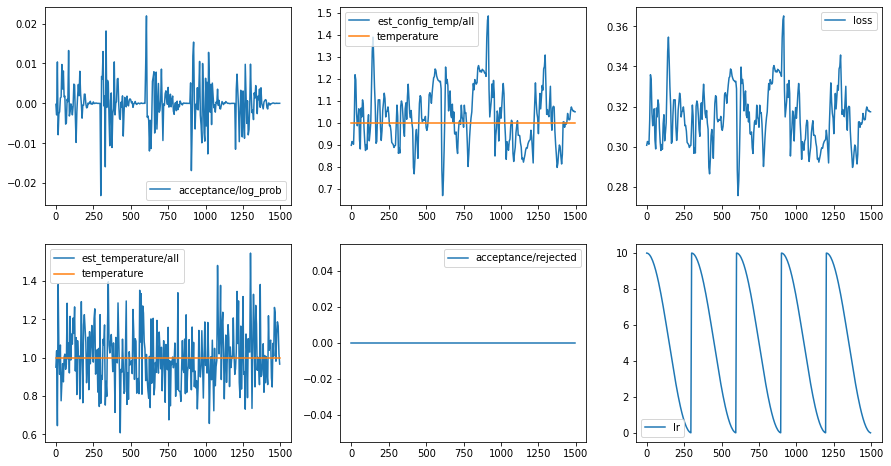

In [239]:
_, axes = plt.subplots(2, 3, figsize=(15, 8))
plot_metric(axes[0, 0], d, 'acceptance/log_prob')
plot_metric(axes[0, 1], d, 'est_config_temp/all')
plot_metric(axes[0, 1], d, 'temperature')
plot_metric(axes[1, 0], d, 'est_temperature/all')
plot_metric(axes[1, 0], d, 'temperature')
plot_metric(axes[1, 1], d, 'acceptance/rejected')

plot_metric(axes[0, 2], d, 'loss')
plot_metric(axes[1, 2], d, 'lr')

# OurHMC metrics

Produced with
```bash
python experiments/train_bnn.py -D with model=test_gaussian warmup=0 \
    burnin=0 n_samples=300 inference=OurHMC momentum=1.0 lr=10.0
```

Note that loss=temperature because we're sampling from a Gaussian.

In [236]:
d = read_metrics("../logs/57")
d.keys()

dict_keys(['acceptance/log_prob', 'acceptance/rejected', 'energy', 'est_config_temp/0.p', 'est_config_temp/all', 'est_temperature/0.p', 'est_temperature/all', 'loss', 'lr', 'preconditioner/0.p', 'temperature'])

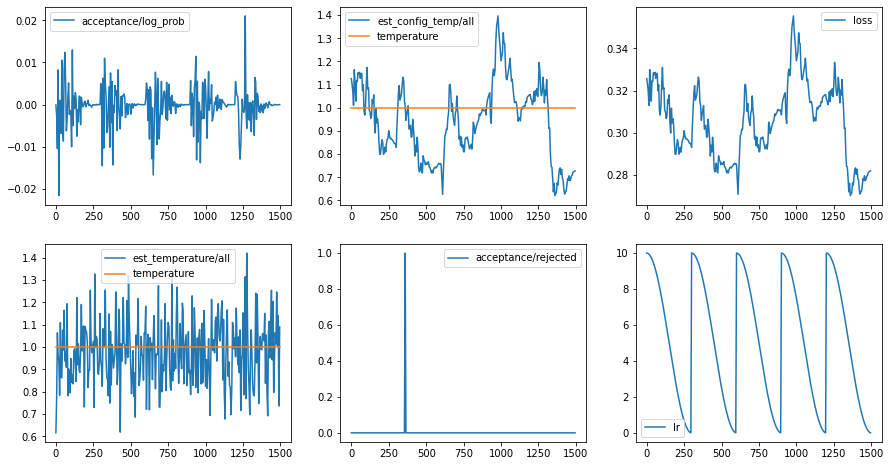

In [237]:
_, axes = plt.subplots(2, 3, figsize=(15, 8))
plot_metric(axes[0, 0], d, 'acceptance/log_prob')
plot_metric(axes[0, 1], d, 'est_config_temp/all')
plot_metric(axes[0, 1], d, 'temperature')
plot_metric(axes[1, 0], d, 'est_temperature/all')
plot_metric(axes[1, 0], d, 'temperature')
plot_metric(axes[1, 1], d, 'acceptance/rejected')

plot_metric(axes[0, 2], d, 'loss')
plot_metric(axes[1, 2], d, 'lr')

# SGLD metrics

Produced with
```bash
python experiments/train_bnn.py -D with model=test_gaussian warmup=0 \
    burnin=0 n_samples=300 inference=SGLD momentum=0.6 lr=10.0
```

In [234]:
d = read_metrics("../logs/52")
d.keys()

dict_keys(['est_config_temp/0.p', 'est_config_temp/all', 'est_temperature/0.p', 'est_temperature/all', 'loss', 'lr', 'preconditioner/0.p', 'temperature'])

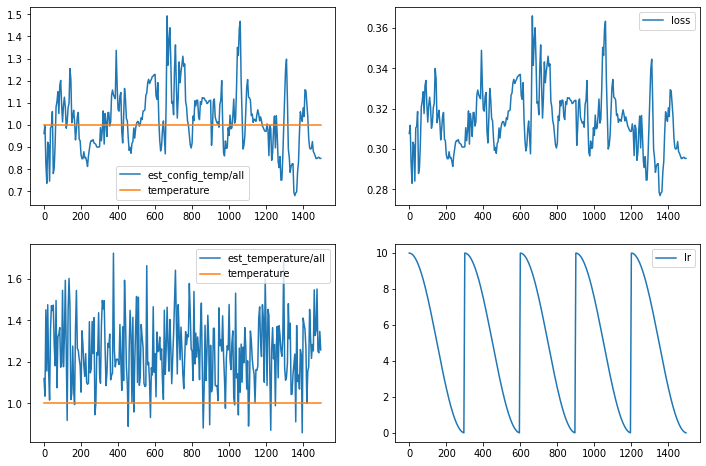

In [235]:
_, axes = plt.subplots(2, 2, figsize=(12, 8))
plot_metric(axes[0, 0], d, 'est_config_temp/all')
plot_metric(axes[0, 0], d, 'temperature')
plot_metric(axes[1, 0], d, 'est_temperature/all')
plot_metric(axes[1, 0], d, 'temperature')

plot_metric(axes[0, 1], d, 'loss')
plot_metric(axes[1, 1], d, 'lr')